In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import exchange as e

In [2]:
# Loader text filen med simulations resultater teksten i '' er filnavn til simulation
Sim = pd.read_csv('Sim_2035_1985.txt', sep="\t", index_col="hour")

# det her renser dataframen lidt det behøves ik ændres i
if 'Unnamed: 404' in Sim.columns and Sim['Unnamed: 404'].isnull().all():
    Sim = Sim.drop('Unnamed: 404', axis=1)

In [3]:
# Laver en dataframe der isolere EENS og surplus
pattern_e = re.compile("(.*_EENS|.*_surplus)")
EENS_sur = Sim.filter(regex=pattern_e)

In [4]:
# Nogle af kollonerne i import og eksport delen i resultaterne ser lidt sjovt ud med flere kolloner for et
# et område, dette renses sådan at den energi der sendes DK_1 til DELU og til DELU_1 er det samme
Sim['DK1_to_DELU'] = Sim['DK1_to_DELU'] + Sim['DK1_to_DELU_1']
Sim.drop('DK1_to_DELU_1', axis=1, inplace=True)
Sim['DK2_to_SE4'] = Sim['DK2_to_SE4'] + Sim['DK2_to_SE4_1'] + Sim['DK2_to_SE4_2'] + Sim['DK2_to_SE4_3']
Sim.drop({'DK2_to_SE4_1', 'DK2_to_SE4_2', 'DK2_to_SE4_3'}, axis=1, inplace=True)
Sim['SE3_to_SE4'] = Sim['SE3_to_SE4'] + Sim['SE3_to_SE4_1']
Sim.drop('SE3_to_SE4_1', axis=1, inplace=True)
Sim['DELU_to_BE'] = Sim['DELU_to_BE'] + Sim['DELU_to_BE_1']
Sim.drop('DELU_to_BE_1', axis=1, inplace=True)
Sim['CH_to_IT'] = Sim['CH_to_IT'] + Sim['CH_to_IT_1']
Sim.drop('CH_to_IT_1', axis=1, inplace=True)

In [5]:
# Her finder jeg de kolloner der har et 'to' imellem altså nodes med import eksport
pattern = r'^\w+_to_\w+$' 
Sim_nodes = Sim.filter(regex=pattern)
# Fjerner alt import export med units til sidst
columns_to_remove = [col for col in Sim_nodes.columns if col.endswith("_units")]
Sim_nodes = Sim_nodes.loc[:, ~Sim_nodes.columns.isin(columns_to_remove)]

In [6]:
# sørger for at det kun er nogle bestemte kolloner der er inkluderet i datsættet
nodes = ['DK1', 'DK2', 'NL', 'DELU']
columns_to_keep = [col for col in Sim_nodes.columns if any(node in col for node in nodes)]
columns_to_keep_e = [col for col in EENS_sur.columns if any(node in col for node in nodes)]
Sim_nodes = Sim_nodes[columns_to_keep]
EENS_sur = EENS_sur[columns_to_keep_e]

In [7]:
#Her defineres de lav produktions perioder som blev fundet i Dataanalyse-2035.ipynb
low_energy = [(805,924),(1290,1409),(1492,1611),(4088,4207),(5425,5544),(6334,6453),(7149,7268),
              (7549,7668),(7758,7877),(8155,8274)]

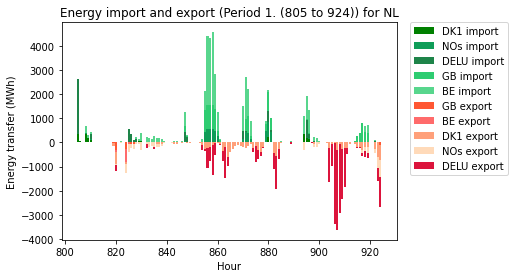

Total surplus: 656,947.35. 
Total EENS: 0.01. 


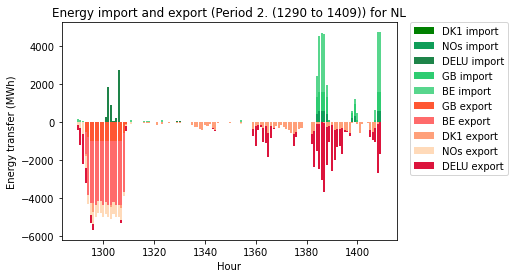

Total surplus: 1,079,152.40. 
Total EENS: 0.01. 


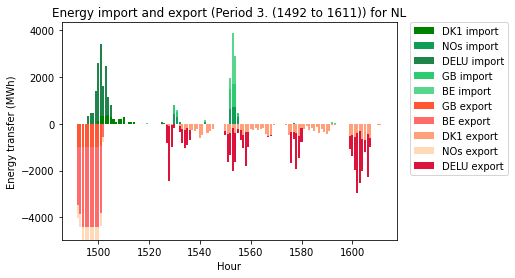

Total surplus: 913,950.71. 
Total EENS: 0.01. 


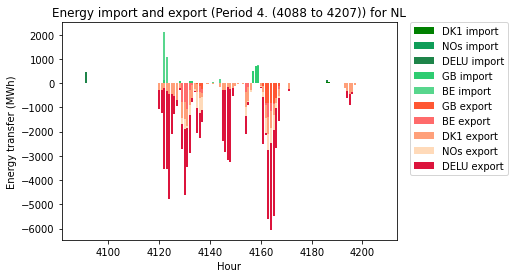

Total surplus: 1,106,574.42. 
Total EENS: 0.01. 


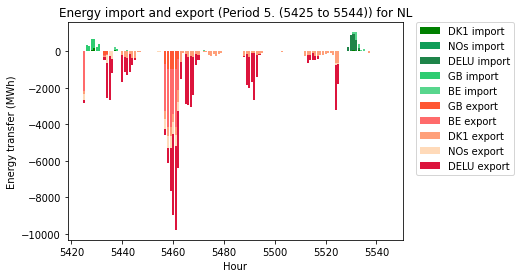

Total surplus: 1,185,382.60. 
Total EENS: 0.01. 


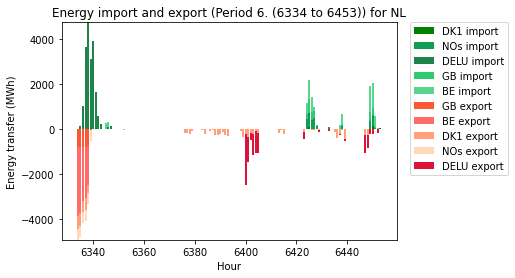

Total surplus: 679,398.82. 
Total EENS: 237.73. 


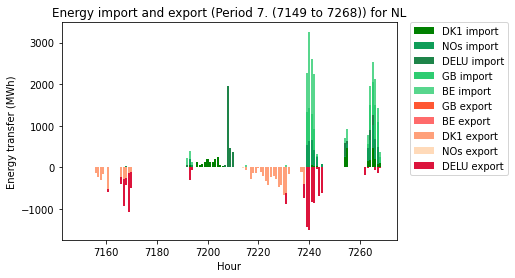

Total surplus: 688,349.76. 
Total EENS: 1,076.66. 


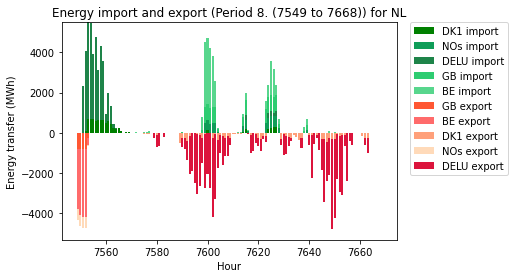

Total surplus: 630,542.90. 
Total EENS: 0.03. 


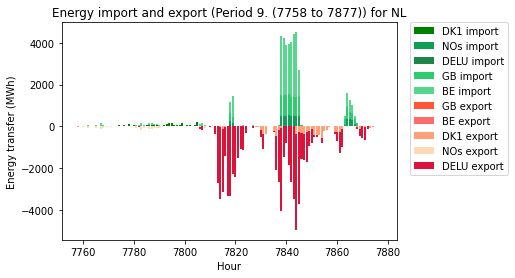

Total surplus: 775,913.88. 
Total EENS: 193.74. 


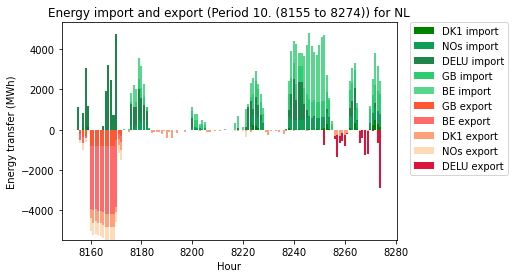

Total surplus: 335,405.52. 
Total EENS: 8,416.78. 


In [8]:
#Denne blok kalder på funktionen plot_energy_transfer_l fra filen exchange.py. Funktionen plotter import og eksport i et
#Givent land i en tidsperiode og opdeler grafen i origin node (for import) og destination node (for eskport)
#Koden returrneerer også det summerede surplus og EENS for perioden. Bagved liggende kode er beskrevet i exchange.py
#Her er koden valgt til at kigge på Holland. Man kan ændre 'NL' til en anden node
for period in low_energy:
    e.plot_energy_transfer_l(Sim_nodes, 'NL', period, EENS_sur)

In [9]:
#Denne blok gør stort set det samme som ovenover men summerer istedet for importen og eksporten for hver origin og
#destination notde samt summerer for alle nodes og returnerer de numeriske værdier. Koden returnerer også 
#det summerede surplus og EENS for perioden. Bagved liggende kode er beskrevet i exchange.py
#Her er koden valgt til at kigge på Holland. Man kan ændre 'NL' til en anden node.
for period in low_energy:
    e.print_energy_transfer_l(Sim_nodes, 'NL', period, EENS_sur)

Period 1. (805 to 924)

Total import
DK1: 2,042.793
NOs: 5,740.442
DELU: 6,211.685
GB: 10,736.388
BE: 23,436.446
Total import: 48,167.755

Total export
DK1: 11,857.533
NOs: 5,103.479
DELU: 28,077.673
GB: 797.585
BE: 739.458
Total export: 46,575.728

Total surplus: 656,947.35. 
Total EENS: 0.01. 


Period 2. (1290 to 1409)

Total import
DK1: 0.000
NOs: 4,207.317
DELU: 6,059.923
GB: 7,953.714
BE: 19,335.599
Total import: 37,556.552

Total export
DK1: 18,285.064
NOs: 10,817.211
DELU: 40,139.189
GB: 14,929.995
BE: 50,524.168
Total export: 134,695.627

Total surplus: 1,079,152.40. 
Total EENS: 0.01. 


Period 3. (1492 to 1611)

Total import
DK1: 2,876.912
NOs: 3,166.096
DELU: 13,030.384
GB: 3,632.537
BE: 4,180.542
Total import: 26,886.471

Total export
DK1: 20,572.288
NOs: 5,915.358
DELU: 32,253.499
GB: 9,969.284
BE: 32,547.641
Total export: 101,258.070

Total surplus: 913,950.71. 
Total EENS: 0.01. 


Period 4. (4088 to 4207)

Total import
DK1: 82.546
NOs: 16.141
DELU: 530.420
GB: 2,368.97

In [10]:
#Storset samme kode som ovenover men her en version af koden som ikke er begrænset til at blive kørt i et loop over en liste.
#Her printes import og eksport til og fra de forskellige nodes samt det samlede import og eksport. Samlede EENS og surplus
#printes også. Holland er valgt som node i fokus. Dette kan ændres ved at ændre 'NL'. Hele datasættet 0-8760 er valgt dette
#kan ændres ved at ændre (0,8760).
e.print_energy_transfer(Sim_nodes, 'NL', (0,8760), EENS_sur)

Period (0 to 8760)

Total import
DK1: 362,628.466
NOs: 110,479.917
DELU: 2,277,814.729
GB: 254,906.954
BE: 509,202.405
Total import: 3,515,032.471

Total export
DK1: 729,473.232
NOs: 1,709,127.082
DELU: 2,907,773.386
GB: 1,818,902.117
BE: 5,711,997.795
Total export: 12,877,273.614

Total surplus: 103,137,317.09. 
Total EENS: 10,884.54. 




In [8]:
#Samme som ovenover men med 'DK1' istedet for 'NL'
e.print_energy_transfer(Sim_nodes, 'DK1', (6334, 6453 + 1), EENS_sur)

Period (6334 to 6454)

Total import
DKEI: 32,482.906
DK2: 10,015.689
NOs: 43,898.056
SE3: 31,242.269
DELU: 83,972.188
NL: 9,265.783
GB: 24,476.769
Total import: 235,353.659

Total export
DKEI: 0.000
DK2: 1,522.224
NOs: 8,779.175
SE3: 11,609.452
DELU: 6,297.164
NL: 615.979
GB: 6,131.518
Total export: 34,955.511

Total surplus: -185,816.87. 
Total EENS: 1,537.88. 




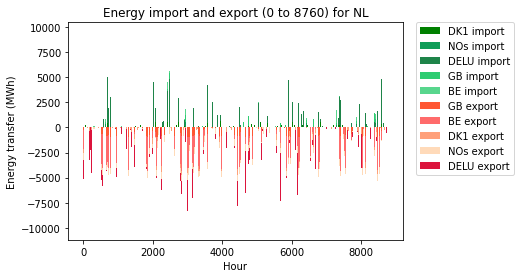

Total surplus: 103,137,317.09. 
Total EENS: 10,884.54. 


In [12]:
#Et plot der viser det samme som tallene ovenover her kan man se import og eksport for Holland i hele datsættet
#hvor grafen er opgjort i origin og destination nodes derudover printes det totale surplus og totale EENS 
#igennem alle 8760 timer. Node kan ændres ved at ændre 'NL' og perioden kan ændres ved at ændre (0,8760)
e.plot_energy_transfer(Sim_nodes, 'NL', (0,8760), EENS_sur)

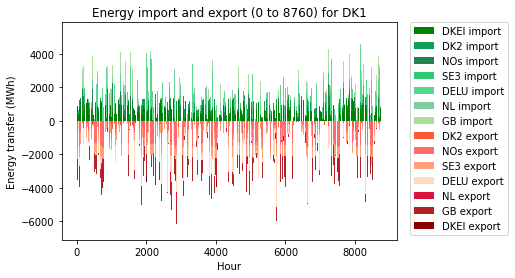

Total surplus: 6,091,430.31. 
Total EENS: 11,277.43. 


In [13]:
#Samme plot som over men for 'DK1'
e.plot_energy_transfer(Sim_nodes, 'DK1', (0,8760), EENS_sur)

In [14]:
#Her kaldes consecutive_export funktionen fra exchange.py. Funktionen finder sammenhængende perioder hvor export er over
#en bestemt kritisk værdi. Her kaldes funktionen med noden 'NL' den kalder med antallet af sammenhængde timer=5 det vil sige 
#at en periode skal være minimum 5 sammenhængende timer. derefter kaldes den med den kritiske værdi som er sat til 5500.
#Det vil sige at funktionen finder perioder der er 5 sammenhængende (eller flere) timer hvor hver time har en eksport på
#mindst 5500. Til sidst printer den hvor mange perioder der er fundet som opfylder disse kriterier
e.consecutive_export(Sim_nodes, 'NL', 5, 5500)

[0, 1, 2, 3, 4]
[10, 11, 12, 13, 14]
[22, 23, 24, 25, 26, 27, 28, 29]
[576, 577, 578, 579, 580]
[656, 657, 658, 659, 660, 661, 662]
[936, 937, 938, 939, 940]
[1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670]
[1824, 1825, 1826, 1827, 1828]
[1929, 1930, 1931, 1932, 1933]
[2783, 2784, 2785, 2786, 2787]
[2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836]
[2898, 2899, 2900, 2901, 2902]
[3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152]
[3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169]
[3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341]
[3455, 3456, 3457, 3458, 3459]
[3802, 3803, 3804, 3805, 3806]
[3889, 3890, 3891, 3892, 3893]
[4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445]
[4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456]
[4475, 4476, 4477, 4478, 4479]
[4953, 4954, 4955, 4956, 4957, 4958]
[5458, 5459, 5460, 5461, 5462]
[5939, 5940, 5941, 5942, 5943, 5944]
[6117, 6118, 6119, 6120, 6121]
[6322, 

In [15]:
#Her kaldes consecutive_import funktionen fra exchange.py. Funktionen er modsat funktionen fra ovenover og finder istedet
#sammenhængende timer hvor importen er over en kritisk værdi. Der fokuseres her på 'DK1'. Igen er sammenhængende timer sat 
#til 5 timer og den kritiske værdi for hver time er sat til 4000
e.consecutive_import(Sim_nodes, 'DK1', 5, 4000)

[231, 232, 233, 234, 235, 236, 237]
[576, 577, 578, 579, 580, 581]
[1408, 1409, 1410, 1411, 1412]
[2066, 2067, 2068, 2069, 2070, 2071]
[2112, 2113, 2114, 2115, 2116, 2117, 2118]
[2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135]
[2141, 2142, 2143, 2144, 2145]
[2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357]
[2457, 2458, 2459, 2460, 2461]
[2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480]
[2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909]
[3850, 3851, 3852, 3853, 3854]
[7425, 7426, 7427, 7428, 7429, 7430]
[8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127, 8128, 8129, 8130, 8131, 8132, 8133, 8134]
[8161, 8162, 8163, 8164, 8165, 8166, 8167, 8168, 8169, 8170]
[8384, 8385, 8386, 8387, 8388]
[8470, 8471, 8472, 8473, 8474, 8475, 8476]

 Number of periods with consecutive hours of import above 4000: 17
